In [3]:
# importing the important libraries

#Basic libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt


# Surprise libraries

from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

In [4]:
os.getcwd()

'E:\\Great Learning\\Projects\\Recommender System'

## Q1

In [5]:
# Q1.A reading the csv file into dataframes

file1=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_1.csv')
file2=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_2.csv')
file3=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_3.csv')
file4=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_4.csv')
file5=pd.read_csv('E:\\Great Learning\\Projects\\Recommender System\\Data Set\\phone_user_review_file_5.csv')

In [6]:
print(file1.shape)
print(file2.shape)
print(file3.shape)
print(file4.shape)
print(file5.shape)

(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)


In [7]:
# merging the all 5 dataframes into single


mobile=pd.concat([file1,file2,file3,file4,file5],ignore_index=True)

In [8]:
mobile.shape

(1251296, 11)

In [9]:
mobile

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
1251291,/cellphones/sony-ericsson-z710i/,8/7/2006,fr,fr,GraphMobile,graphmobile.com,10.0,10.0,Pour info il est sur amazon.de a 212.99€ s'il ...,NaN,Sony-Ericsson Z710i
1251292,/cellphones/sony-ericsson-z710i/,8/5/2006,fr,fr,GraphMobile,graphmobile.com,9.0,10.0,Habitué à samsung sony nous sort 1 jolie clam ...,NaN,Sony-Ericsson Z710i
1251293,/cellphones/sony-ericsson-z710i/,7/19/2006,fr,fr,GraphMobile,graphmobile.com,10.0,10.0,"Pour les gens qui ne regarde pas Il fait mp3, ...",NaN,Sony-Ericsson Z710i
1251294,/cellphones/sony-ericsson-z710i/,7/9/2006,fr,fr,GraphMobile,graphmobile.com,9.0,10.0,C vrai que sans le mp3 c moyen...,NaN,Sony-Ericsson Z710i


In [10]:
# Q1.B Exploring and understanding the data

mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1199479.0,8.050337,2.622776,0.2,8.0,10.0,10.0,10.0
score_max,1199479.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0


In [11]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251296 entries, 0 to 1251295
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1251296 non-null  object 
 1   date       1251296 non-null  object 
 2   lang       1251296 non-null  object 
 3   country    1251296 non-null  object 
 4   source     1251296 non-null  object 
 5   domain     1251296 non-null  object 
 6   score      1199479 non-null  float64
 7   score_max  1199479 non-null  float64
 8   extract    1234823 non-null  object 
 9   author     1201151 non-null  object 
 10  product    1251295 non-null  object 
dtypes: float64(2), object(9)
memory usage: 105.0+ MB


In [12]:
print("Minimum rating:", mobile['score'].min())
print("Maximum rating:", mobile['score'].max())

Minimum rating: 0.2
Maximum rating: 10.0


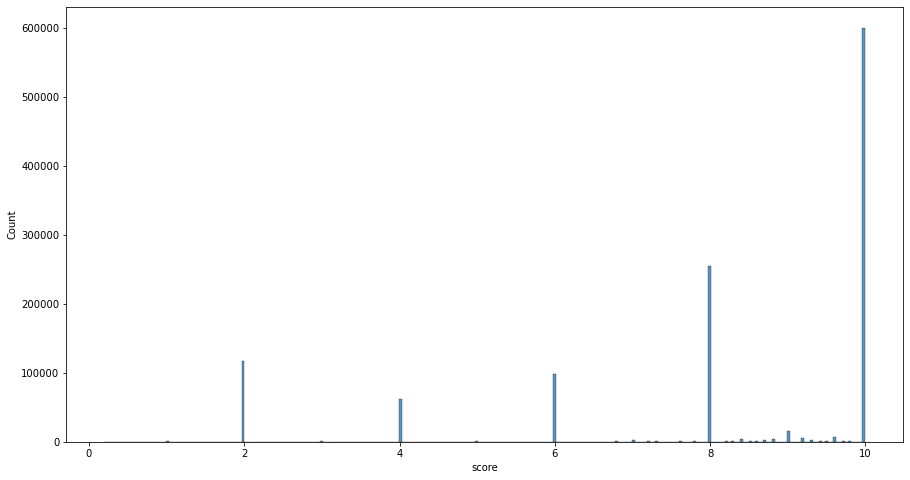

In [13]:
plt.figure(figsize=(15,8))
ax=sns.histplot(data=mobile, x='score')

In [14]:
mobile.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        51817
score_max    51817
extract      16473
author       50145
product          1
dtype: int64

In [15]:
# Q1.C  Round of score value to nearest integers

mobile['score']=mobile['score'].fillna(value=-1)   # replacing null value with -1 will handle null value later

mobile['score']=mobile['score'].apply(lambda x: round(x))


In [16]:
mobile['score'].value_counts()

 10    609101
 8     263388
 2     117616
 6      99980
 4      62781
-1      51817
 9      34391
 7       6306
 5       2708
 1       1795
 3       1395
 0         18
Name: score, dtype: int64

In [17]:
# Q1.D  Checking and handling missing value
print('count of missing value:\n',mobile.isnull().sum())
print()
print('Percentage of missing value:\n', mobile.isnull().sum()*100/mobile['phone_url'].count())

count of missing value:
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    51817
extract      16473
author       50145
product          1
dtype: int64

Percentage of missing value:
 phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        0.000000
score_max    4.141067
extract      1.316475
author       4.007445
product      0.000080
dtype: float64


In [18]:
# missing value

unknowns = ['Anonymous','unknown','??????????']
mobile['author'].replace(to_replace = unknowns, 
                          value = np.nan, 
                          inplace=True)


In [19]:
print('count of missing value:\n',mobile.isnull().sum())
print()
print('Percentage of missing value:\n', mobile.isnull().sum()*100/mobile['phone_url'].count())

count of missing value:
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    51817
extract      16473
author       54172
product          1
dtype: int64

Percentage of missing value:
 phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        0.000000
score_max    4.141067
extract      1.316475
author       4.329271
product      0.000080
dtype: float64


In [20]:
# For Author we will delete null rows because we don't know the author name and its contains only 4.32% of data
mobile.dropna(subset=['author'], inplace=True)

In [21]:
mobile.shape

(1197124, 11)

In [22]:
print(mobile['score_max'].value_counts())

# for score_max will replace null value with 10 

mobile['score_max']=mobile['score_max'].fillna(value=10.0)

10.0    1147574
Name: score_max, dtype: int64


In [23]:
# will replace null of value of score to median(i.e mode)

mobile['score'].value_counts()



 10    583561
 8     251332
 2     113631
 6      94562
 4      59123
-1      49550
 9      33636
 7       6166
 5       2569
 1       1642
 3       1334
 0         18
Name: score, dtype: int64

In [24]:
mobile=mobile.replace(-1, 10)

In [25]:
mobile['score'].value_counts()

10    633111
8     251332
2     113631
6      94562
4      59123
9      33636
7       6166
5       2569
1       1642
3       1334
0         18
Name: score, dtype: int64

In [26]:
# Q1.E  Removing duplicate records

mobile.duplicated().sum()

4693

In [27]:
mobile.drop_duplicates(inplace=True)

In [28]:
mobile.duplicated().sum()

0

In [29]:
# Q1.F Getting sample of 1 million records

new_mobile=mobile.sample(n=1000000, random_state=612)

In [30]:
new_mobile.shape

(1000000, 11)

In [31]:
# Q1.G Keeping only relevate features

new_mobile=new_mobile[['author','product','score']]

new_mobile.shape

(1000000, 3)

In [32]:
new_mobile.head()

,author,product,score
388324,sia vubu elsa,"Samsung J100 Galaxy J1 Smartphone, 4GB, Bianco...",4
293945,cristian m.,LG G Flex 2 H950 32GB Unlocked GSM Curved P-OL...,10
431364,Mithunraj..,"Lenovo Vibe K4 Note (Black, 16GB)",10
777529,Joe I,"BLU Studio 5.0 C HD Unlocked Cellphone, White",10
923795,svdp3,Sony Ericsson Xperia arc,10


## Q2

In [33]:
# Q2.A Most rated product

print("Most rated product(By number of reviews):\n", new_mobile['product'].value_counts().head())


Most rated product(By number of reviews):
 Lenovo Vibe K4 Note (White,16GB)     4334
Lenovo Vibe K4 Note (Black, 16GB)    3675
OnePlus 3 (Graphite, 64 GB)          3465
OnePlus 3 (Soft Gold, 64 GB)         2989
Samsung Galaxy Express I8730         2252
Name: product, dtype: int64


In [34]:
print("Most rated product(By highest rating):\n",new_mobile.groupby('product')['score'].mean().sort_values(ascending=False).head())

Most rated product(By highest rating):
 product
金屬 + 皮革 = 質感滿分　Wave 723 詳測及心得                                                                                                            10.0
Huawei Смартфон Huawei P9 32Gb Silver (EVA-L19)                                                                                          10.0
Huawei Сотовый телефон P8 Lite Black                                                                                                     10.0
Huawei.. 5.5" HUAWEI Mate 9 Pro 6GB/128GB LON-L29 Dual SIM Leica Dual Camera Factory Unlocked Cell Phone(Haze Gold) - 1 Year Warranty    10.0
Hummer H5 4 inch Android 4.2 MTK6572 Dual Core 512MB+4G Dual SIM Dual Standby Smartphone                                                 10.0
Name: score, dtype: float64


In [35]:
# Q2.B User have highest number of reviews

print("User have highest number of reviews:\n", new_mobile['author'].value_counts().head())

User have highest number of reviews:
 Amazon Customer    63672
Cliente Amazon     16217
e-bit               7015
Client d'Amazon     6455
Amazon Kunde        3951
Name: author, dtype: int64


In [36]:
# Q2.C top 50 author with top 50 rated product

x=new_mobile['author'].value_counts()>=50
y=x[x].index
print(y.shape)

(717,)


In [37]:
x.size

606249

In [38]:
df=new_mobile[new_mobile['author'].isin(y)]

In [39]:
df

,author,product,score
427573,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",8
117024,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10
44888,e-bit,Smartphone Apple iPhone 6S 16GB,10
201942,Cliente Amazon,"Microsoft Lumia 640 XL LTE Smartphone, 8 GB, N...",10
852576,Amazon Kunde,"Apple iPhone 5 32GB schwarz, ohne Vertrag",10
...,...,...,...
367221,Amazon Customer,"Samsung Galaxy E5 (White,16GB)",2
362083,Samuel,Lenovo Motorola Moto G4 - Smartphone libre And...,10
68737,José,"Huawei P9 Lite, 16GB, Dual Sim, pantalla Full ...",10
613811,Mauro,"Samsung Galaxy Mega 6.3, Bianco [Italia]",10


In [40]:
df2=df.groupby('product')['score'].count().reset_index()
df2.rename(columns={'score':'number_of_ratings'}, inplace=True)
df3=df.merge(df2,on='product')

df3.shape

df3=df3[df3['number_of_ratings']>=50]

df3.drop_duplicates(['author', 'product'], inplace=True)

In [41]:
df3.shape

(12116, 4)

In [42]:
df3

,author,product,score,number_of_ratings
0,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",8,2160
19,Sandy,"Lenovo Vibe K4 Note (Black, 16GB)",6,2160
63,Ashish,"Lenovo Vibe K4 Note (Black, 16GB)",4,2160
75,Rahul,"Lenovo Vibe K4 Note (Black, 16GB)",10,2160
184,Ganesh,"Lenovo Vibe K4 Note (Black, 16GB)",8,2160
...,...,...,...,...
133727,Руслан,Samsung S7270 Galaxy Ace 3 (белый),9,55
133730,Антон,Samsung S7270 Galaxy Ace 3 (белый),9,55
133733,Владимир,Samsung S7270 Galaxy Ace 3 (белый),9,55
133743,Alex,Samsung S7270 Galaxy Ace 3 (белый),9,55


## Q3

In [43]:

ratings_mean_count = pd.DataFrame(df3.groupby('product')['score'].mean())
ratings_mean_count['number_of_ratings'] = df3.groupby('product')['score'].count()
ratings_mean_count = ratings_mean_count.sort_values(by=['score','number_of_ratings'], ascending=[False,False])

print('Top 5 recommendations for the products are: \n', ratings_mean_count.head())


Top 5 recommendations for the products are: 
                                                score  number_of_ratings
product                                                                
ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)    10.0                 37
ASUS ZenFone 3 Max ZC520TL 16GB (серебристый)   10.0                 35
ASUS ZenFone 3 Max ZC520TL 16GB (серый)         10.0                 34
Nokia E51 Cep Telefonu                          10.0                 29
Nokia 6300 Cep Telefonu                         10.0                 28


## Q4

In [44]:
#pip install scikit-surprise


In [45]:
# laoding and spliting data into train and test 

reader = Reader(rating_scale = (0,10)) 
data = Dataset.load_from_df(df3[["author","product","score"]], reader=reader)
trainset, testset = train_test_split(data, test_size=0.25,random_state=612)


### Collaborative filtering model using SVD

In [46]:
# Default SVD without any parameters

# Train data
svd = SVD()
svd.fit(trainset)


# Test data
pred_svd = svd.test(testset)

# Few Pedictions on test data
pred_svd[0:5]

[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=8.662183751668016, details={'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=8.494764567913942, details={'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.704787758220066, details={'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.277504883946024, details={'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=7.4874717890070706, details={'was_impossible': False})]

### Collaborative filtering model using KNNWithMeans item based

In [47]:

# Train data
KNN_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
KNN_item.fit(trainset)


# Test data
pred_knn_item = KNN_item.test(testset)


# Few Pedictions on test data
pred_knn_item[:5]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=9.89660876757651, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=8.509672652041983, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.249988081889814, details={'actual_k': 18, 'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.280942298012025, details={'actual_k': 14, 'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=5.517241379310345, details={'actual_k': 0, 'was_impossible': False})]

### Collaborative filtering model using KNNWithMeans user based

In [48]:

# Train data
KNN_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
KNN_user.fit(trainset)


# Test data
pred_knn_user = KNN_user.test(testset)


# Few Prediction on test data
pred_knn_user[:5]

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=7.9621620664966954, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=8.15926810485237, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.734299761636244, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.654759929564316, details={'actual_k': 18, 'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=2.878787878787879, details={'actual_k': 1, 'was_impossible': False})]

## Q 5

In [49]:
# RMSE of all 3 models on test data

print('RMSE of SVD:', accuracy.rmse(pred_svd))

print('RMSE of user based:', accuracy.rmse(pred_knn_user))

print('RMSE of item based:', accuracy.rmse(pred_knn_item))

#print('RMSE of item-item based:', accuracy.rmse(test_pred))


RMSE: 2.2817
RMSE of SVD: 2.2817241668692025
RMSE: 2.5631
RMSE of user based: 2.5630672274497903
RMSE: 2.4779
RMSE of item based: 2.477885272473763


RMSE: 2.2817
RMSE: 2.4779
RMSE: 2.5631


<AxesSubplot:>

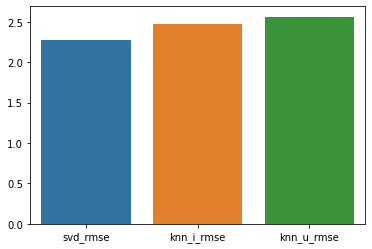

In [50]:
# Visualization of 3 RMSEs

sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[accuracy.rmse(pred_svd),accuracy.rmse(pred_knn_item),accuracy.rmse(pred_knn_user)])

## Q 6

In [51]:
# Average rating for test user

# For SVD

svd_pred_df=pd.DataFrame(pred_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('actual average rating by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  8.56329773806081
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.6475167961506834


In [52]:
# For KNNWithMean User based

knnu_pred_df=pd.DataFrame(pred_knn_user, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knnu_pred_df['est'].mean())
print('actual average rating by test users: ',knnu_pred_df['rui'].mean())
print('average prediction error for test users: ',(knnu_pred_df['rui']-knnu_pred_df['est']).abs().mean())

average prediction for test users:  8.42350561213588
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.759355198039684


In [53]:
# For KNNWithMean item based

knni_pred_df=pd.DataFrame(pred_knn_item, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knni_pred_df['est'].mean())
print('actual average rating by test users: ',knni_pred_df['rui'].mean())
print('average prediction error for test users: ',(knni_pred_df['rui']-knni_pred_df['est']).abs().mean())

average prediction for test users:  8.455485149893288
actual average rating by test users:  8.552657642786398
average prediction error for test users:  1.7120273890801105


## Q 7

## Q 8

In [54]:
def get_top_rec(predictions, n=5):
    # First map the predictions to each user.
    top_rec = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_rec[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_rec.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_rec[uid] = user_ratings[:n]

    return top_rec

  
    

In [55]:
# For SVD

#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_svd,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')



Top 5 recommendations for all test users are: 

Angela ->  [('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 9.08971121830571), ('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 8.662183751668016), ('Nokia 105 (Black)', 8.048317258055251), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 7.983380408257752), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 7.244335180632622)] 

Ирина ->  [('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.504433820223976), ('Sony Xperia Z1 Compact (белый)', 9.044418251982835), ('Sony Xperia Z1 Compact (розовый)', 8.846121546240061), ('LG Optimus L7 P705 Black', 8.696031084331672), ('Sony Xperia Z (черный)', 8.6588596528234)] 

Наталья ->  [('Samsung N7100 Galaxy Note II 16GB (белый)', 9.704787758220066), ('Sony X

Tony ->  [('Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 9.73193119052751), ('Samsung Galaxy S7 zwart / 32 GB', 9.276176340845906), ('Apple iPhone 5s (Gold, 16GB)', 8.517311035060773), ('Sony Xperia M4 Aqua 16GB GSM/LTE Unlocked Cell Phone - Black (U.S. Warranty)', 7.189366809890591), ('Sprint LG Volt White (Sprint Prepaid)', 6.909012864234685)] 

Олег ->  [('LG X power (золотистый)', 9.874484097130605), ('Apple iPhone 5s 16GB (серый космос)', 9.65688537409629), ('Nokia 101 Premium Black', 9.538515553579925), ('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.421125500383571), ('Sony Xperia Z1 (фиолетовый)', 9.244791906121135)] 

Катерина ->  [('Apple iPhone 5s 16GB (серебристый)', 9.54856261681189), ('Sony Xperia Z1 Compact (черный)', 9.425122124915308), ('Sony Xperia Z1 (белый)', 9.168583493449065), ('Sony Xperia Z1 Compact (розовый)', 9.076265244837575), ('Nokia 5230 Navigation 


Jose ->  [('Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13 MP, 16 GB, 2 GB RAM), color negro', 10), ('Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, HiSilicon Kirin 935, 64 bit Super 8+1 Core, 2.2 GHz, 3 GB de RAM, 16 GB ROM, cámara de 20 MP/8 MP, Android 5.0 con EMUI 3.1), color gris', 9.536306825072794), ('Doogee X5 - Smartphone Libre 3G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 1GB RAM, 8GB ROM, 5.0MP Cámara, Dual SIM, GPS, OTG) Celular (Blanco)', 9.27434869783806), ('Doogee 4G 64bit VALENCIA2 Y100 Pro MTK6735P 1.3GHz Quad core 5.0 Pulgada 1280 x 720 pixels IPS pantalla 2GB+16GB Android 5.1 13MP Cámara Doble SIM tarjeta Smartphone libre desbloqueado Plateado', 9.24750691067449), ('Motorola Moto G XT1072 (2ª Generación) 4G - Smartphone libre Android (pantalla 5", cámara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), negro', 8.939544391741293)] 

sandra ->  [('Smartphone Apple iPhone 6 16GB', 9.183927836242065)] 

sam ->  [('Moto

???�?????? ->  [('HTC Desire C White 4710937380293', 9.445460892115872)] 

Ed ->  [('Tracfone LG TracFone 306G No Contract, 2.0 megapixel Camera, 3.2-Inch screen, Black, Retail Packaging', 8.725467915167561)] 

bruno ->  [('Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 9.860598536462737), ('Smartphone Asus ZenFone 2 Laser ZE550KL 16GB', 8.977945445090196), ('Smartphone LG G3 D855', 8.587665595952595)] 

Barbara ->  [('Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia]', 9.273094008993185), ('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 8.804191163528268), ('Asus ZenFone Max Smartphone, Schermo da 5.5" HD, 16 GB, RAM 2 GB, Dual SIM, Nero [Italia]', 8.649844903074237), ('Huawei P8 Lite

In [56]:
# For KNN Item based


#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_knn_item,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')
    


Top 5 recommendations for all test users are: 

Angela ->  [('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 9.89660876757651), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 8.5625), ('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 8.363573120438618), ('Nokia 105 (Black)', 6.0), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 5.428571428571429)] 

Ирина ->  [('Samsung Galaxy S7 edge', 9.683275429835557), ('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.5000561032333), ('LG Optimus L7 P705 Black', 9.285600863695255), ('Sony Xperia Z1 Compact (белый)', 9.265792850559412), ('Sony Xperia Z1 Compact (розовый)', 9.110402363556101)] 

Наталья ->  [('Samsung I8190 Galaxy S III mini 8GB (красный)', 9.911998235320784), ('Apple iPhone 5s 16GB (сереб

Jerry ->  [('LG Nexus 5X Unlocked Smartphone - White 32GB (U.S. Warranty)', 10), ('Samsung Galaxy Note 3/S5 USB 3.0 5-Feet Data Cable, Non-Retail Packaging', 9.88931704450042)] 

Игорь ->  [('ASUS ZenFone 3 Max ZC520TL 16GB (серый)', 10), ('Samsung Galaxy S6', 10), ('Nokia E52', 9.986094527002702), ('Samsung Galaxy A5 (2016)', 9.73676298240432), ('LG K10 (темно-синий)', 9.55862796729864)] 

Алёна ->  [('Sony Xperia SP (черный)', 9.521796825514587), ('Sony Xperia L (черный)', 9.41355417331139), ('Sony Xperia M (фиолетовый)', 9.07778700483702), ('Samsung S6102 Galaxy Y Duos (белый, "Связной-Загрузка")', 8.586965583877705), ('Samsung S6102 Galaxy Y Duos (черный, "Связной-Загрузка")', 8.201608068456224)] 

Sabrina ->  [('Huawei 771657 P8 Lite Smart Smartphone 16GB, Marchio Tim, Grigio Titanio', 10), ('Samsung I9301 Galaxy S III Neo Smartphone, 16 GB, Blu [Italia]', 10), ('Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera

Wendy ->  [('Huawei P8 grijs / 16 GB', 9.155488221962043), ('Huawei P8 Lite wit / 16 GB', 8.913583663532235), ('Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz', 6.568922305764412)] 

Rick ->  [('Huawei P8 Champagne / 16 GB', 9.358031825561453), ('Samsung Galaxy S7 goud, roze / 32 GB', 9.166995438040031), ('Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartphone with 13 MP Camera, Touchscreen and 16 GB Storage, Black', 7.130090067842851)] 

Christian ->  [('Honor 6 - Smartphone libre (pantalla de 5", 16GB, 3 GB de RAM, cámara trasera de 13 MP y delantera de 5 MP, Android OS, v4.4.2 KitKat, LTE) blanco', 9.908120135214636), ('Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania]', 9.860491709548315), ('Huawei P9 Smartphone, LTE, Display 5.2" FHD, Memoria Interna 32 GB, 3 GB RAM, Processore Kirin 95

Petra ->  [('Sony Xperia Z3 UK SIM-Free Smartphone - Copper', 8.382857142857143), ('Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll (13,22 cm) Touch-Display, 16 GB Speicher, Android 5.1) pink-gold', 6.617031650964321), ('Huawei P8lite zwart / 16 GB', 3.8151574183367014)] 

Melissa ->  [('Huawei P8 Lite wit / 16 GB', 9.645049105947527), ('Huawei P8 Lite goud, wit / 16 GB', 8.485714182800479), ('Sony Xperia M4 Aqua 16GB GSM/LTE Unlocked Cell Phone - Black (U.S. Warranty)', 5.193252491717461)] 

Amanda ->  [('MICROSOFT Lumia 650 - 16 GB, Black', 8.144736485279129), ('LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black)', 8.125), ('BLU Studio 6.0 HD - Factory Unlocked ("Black")', 6.363636363636363)] 

eduardo ->  [('Smartphone Apple iPhone 6 16GB', 10), ('Smartphone Samsung Galaxy S5 New Edition SM-G903M', 8.498954550456697)] 

Tobias ->  [('Samsung Galaxy S III Neo Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz', 10), ('Samsung Ga

In [57]:
# For KNN User based


#recommend top 5 products for test users (SVD)
top_rec = get_top_rec(pred_knn_user,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_rec.items(): print(key,'-> ',value,'\n')
    


Top 5 recommendations for all test users are: 

Angela ->  [('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 8.837534095685553), ('Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version)', 8.428571428571429), ('Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black', 8.428571428571429), ('Nokia 105 (Black)', 8.428571428571429), ('Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', 7.9621620664966954)] 

Ирина ->  [('ASUS ZenFone 3 Max ZC520TL 16GB (золотистый)', 9.35586512994586), ('Samsung Galaxy S5 SM-G900F 16GB (белый)', 9.22506802617189), ('Sony Xperia Z1 Compact (белый)', 9.138768852818611), ('Samsung Galaxy S7 edge', 9.06516407639068), ('Sony Xperia L (красный)', 8.939433899667545)] 

Наталья ->  [('Sony Xperia M (черный)', 9.776039018831767), ('Samsung N7100 Gala


Roberta ->  [('Samsung Galaxy S7 Smartphone, 32 GB, Nero', 9.858093313416187), ('Asus ZenFone Go 5" Smartphone, 8 GB, Dual SIM, Bianco [Italia]', 6.830806280004643)] 

anneme ->  [('Nokia N82 Cep Telefonu', 10), ('Nokia 6300 Cep Telefonu', 10)] 

Andrew ->  [('Sony Xperia M (белый)', 9.273780134624547), ('APPLE iPhone 7 - Silver, 128 GB', 9.157831903590614), ('Apple iPhone 5 Unlocked Cellphone, 32GB, Black', 8.569806021829251), ('Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version)', 8.437242910073973), ('Microsoft Lumia 950 Smartphone, 32 GB, Bianco [Italia]', 8.429661197218355)] 

Simone ->  [('WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco', 9.151575497589317), ('Asus ZenFone 3 Max Smartphone, Memoria Interna da 32 GB, Dual-SIM, Argento [Italia]', 8.842838306805158), ('Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 8.591670755008517), ('Huawei P8lite zwart / 16 GB', 8.556196606014575), ('Samsung G920 Gala


Steven ->  [('Samsung Galaxy S7 goud, roze / 32 GB', 9.53846053686847), ('MICROSOFT Lumia 650 - 16 GB, Black', 7.86887569729184)] 

andrea ->  [('Asus ZenFone 3 Max Smartphone, Memoria Interna da 32 GB, Dual-SIM, Grigio [Italia]', 9.733559180970317), ('Lenovo Motorola Moto E 2a Generazione Smartphone, LTE, 8 GB, RAM 1 GB, Nero [Italia]', 9.710661351368698), ('Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer', 9.582462113753637), ("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 9.320364598558116), ('Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia]', 8.852947972229842)] 

. ->  [('Samsung Galaxy J3 (8GB)', 8.0), ('Samsung Galaxy S7 goud, roze / 32 GB', 7.83225880768285)] 

Jeroen ->  [('Samsung Galaxy S7 zwart / 32 GB', 9.15713126249

Valerio ->  [('Asus ZenFone Go 5" Smartphone, 8 GB, Dual SIM, Bianco [Italia]', 8.315134499735652), ('Apple iPhone 5S 16GB Grigio [Italia]', 7.444337215730272)] 

dilemma21 ->  [('Nokia N82 Cep Telefonu', 10)] 

Ben ->  [('Sim Free Motorola Moto G 4th Generation Mobile Phone - Black', 9.448076427591866), ('Samsung Galaxy S7 goud, roze / 32 GB', 8.36907230457419)] 

rahul ->  [('Lenovo Vibe K5 (Gold, VoLTE update)', 7.294770140047666)] 

Roland ->  [('LG G4 Unlocked Smartphone with 32GB Internal Memory, 16 MP Camera and 5.5-Inch IPS Quantum Display for GSM and CDMA, US Warranty (Black Leather)', 10)] 

Erik ->  [('Samsung Galaxy S7 zwart / 32 GB', 8.06980407303888)] 

retkit ->  [('Samsung Omnia (i900) Cep Telefonu', 10)] 

huliye ->  [('Nokia N97 mini Cep Telefonu', 10)] 



## Q 9

In [58]:
def get_model_cv(model):
    model_cv = cross_validate(model,data, measures=['RMSE'], cv=5, verbose=False)
    print('\n Mean cv score:', round(model_cv['test_rmse'].mean(),2),'\n')
    display(model_cv)
    return (round(model_cv['test_rmse'].mean(),2))

In [59]:
# Hyper Tunning


# For SVD

param_grid = {'n_factors': np.arange(1,20)}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



2.2557227401000617
{'n_factors': 1}


In [60]:
svd_h = SVD(n_factors=1)
svd_h.fit(trainset)


# Test data
pred_svdh = svd_h.test(testset)

# Few Pedictions on test data
pred_svdh[0:5]

[Prediction(uid='Angela', iid='Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio', r_ui=6.0, est=8.861884814827665, details={'was_impossible': False}),
 Prediction(uid='Ирина', iid='Samsung Galaxy S5 SM-G900F 16GB (черный)', r_ui=9.0, est=7.497712396299604, details={'was_impossible': False}),
 Prediction(uid='Наталья', iid='Samsung N7100 Galaxy Note II 16GB (белый)', r_ui=10.0, est=9.711283889435096, details={'was_impossible': False}),
 Prediction(uid='Артем', iid='Sony Xperia Z (черный)', r_ui=10.0, est=8.74111504259614, details={'was_impossible': False}),
 Prediction(uid='Christine', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=6.341661065656094, details={'was_impossible': False})]

In [61]:
# For Hyper tunned SVD

print("SVD:")
svd_cvh=get_model_cv(svd_h)

SVD:

 Mean cv score: 2.26 



{'test_rmse': array([2.22925925, 2.30173145, 2.24862973, 2.2684706 , 2.26876336]),
 'fit_time': (0.1651902198791504,
  0.15621471405029297,
  0.1718301773071289,
  0.17183279991149902,
  0.1729724407196045),
 'test_time': (0.05451202392578125,
  0.031244754791259766,
  0.015622138977050781,
  0.015621662139892578,
  0.015620708465576172)}

In [62]:
# Crosss vaidation for KNN Item

print("KNN Item:")
knni_cv=get_model_cv(KNN_item)

KNN Item:
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean cv score: 2.5 



{'test_rmse': array([2.4553779 , 2.55060734, 2.45160197, 2.49202919, 2.54117603]),
 'fit_time': (0.1045682430267334,
  0.08721756935119629,
  0.09888982772827148,
  0.09372305870056152,
  0.08799338340759277),
 'test_time': (0.11761164665222168,
  0.10933065414428711,
  0.12511897087097168,
  0.11331963539123535,
  0.13085079193115234)}

In [63]:
# Crosss vaidation for KNN User

print("KNN User:")
knnu_cv=get_model_cv(KNN_user)

KNN User:
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean cv score: 2.51 



{'test_rmse': array([2.53486899, 2.48393141, 2.43886446, 2.55512241, 2.51278248]),
 'fit_time': (0.1275334358215332,
  0.12491178512573242,
  0.15625309944152832,
  0.13179945945739746,
  0.14059209823608398),
 'test_time': (0.16785073280334473,
  0.16090703010559082,
  0.16064214706420898,
  0.17945575714111328,
  0.14191555976867676)}

<AxesSubplot:>

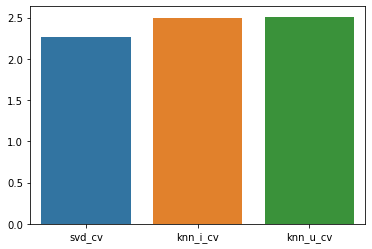

In [64]:
# Visualization of 3 cv RMSEs

sns.barplot(x=['svd_cv','knn_i_cv', 'knn_u_cv'],y=[svd_cvh,knni_cv,knnu_cv])

## Q 10

## Q 11

## Q 12